### <center> Measuring persimmon diameter from RGB images </center>

In [16]:
# import sci-kit image 
from skimage import io
from skimage.color import rgb2lab, label2rgb
from skimage.morphology import remove_small_objects, remove_small_holes, disk, binary_closing
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt

##### Segment the persimmons in image

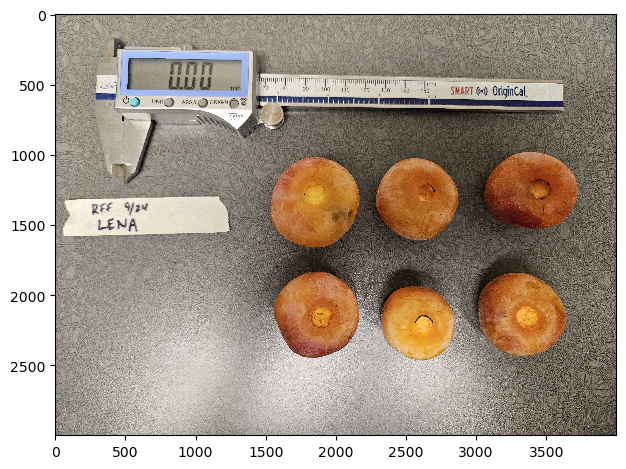

In [17]:
# load image from file
image = io.imread("C:/Users/zack/Downloads/fruit_images/20240925_163221.jpg")

# show image
io.imshow(image)

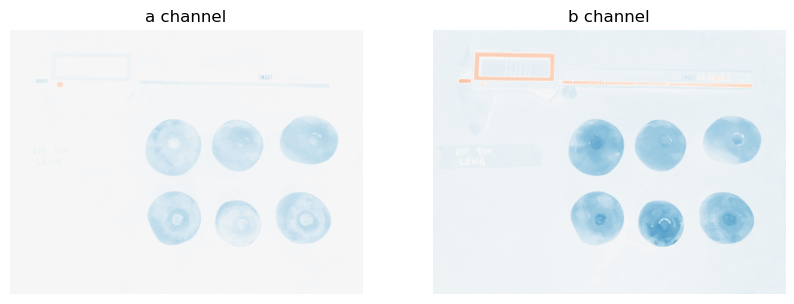

In [18]:
# convert RGB to LAB color space--L: lightness, a: green to red, b: blue to yellow
lab_image = rgb2lab(image)
a_channel = lab_image[:, :, 1]
b_channel = lab_image[:, :, 2]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(a_channel, cmap='RdBu', vmin=-128, vmax=127)
ax[0].set_title('a channel')

ax[1].imshow(b_channel, cmap='RdBu', vmin=-128, vmax=127)
ax[1].set_title('b channel')

for a in ax:
    a.axis('off')

plt.show()

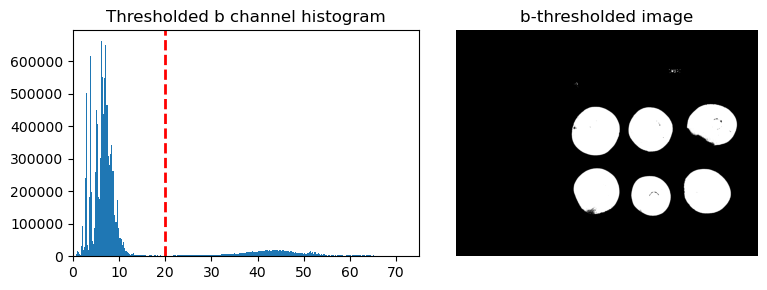

In [19]:
# b channel segments the persimmon better. Threshold the b channel
thresh_b = 20
binary_b = b_channel > thresh_b

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(b_channel.ravel(), 512)
ax0.set_title("Thresholded b channel histogram")
ax0.axvline(x=thresh_b, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 75)

ax1.imshow(binary_b, cmap='gray')
ax1.set_title("b-thresholded image")
ax1.axis('off')

fig.tight_layout()

plt.show()

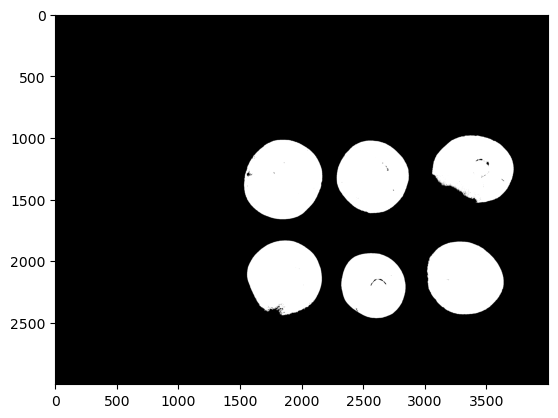

In [20]:
# remove small objects from background
binary_b_rso = remove_small_objects(binary_b, min_size=2000)

# show image
plt.imshow(binary_b_rso, cmap='gray')

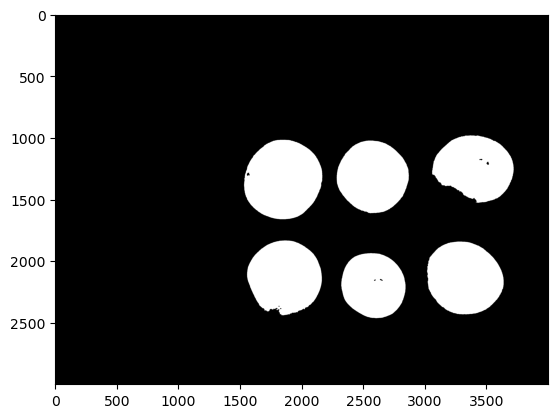

In [21]:
# use morphological closing to smooth edges
selem = disk(4)

# perform morphological closing
binary_b_rso_closing = binary_closing(binary_b_rso, selem)

# show image
plt.imshow(binary_b_rso_closing, cmap='gray')

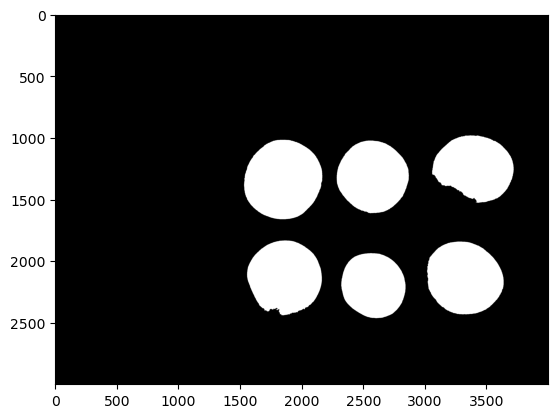

In [22]:
# remove small holes
binary_b_rso_closing_rsh = remove_small_holes(binary_b_rso_closing, area_threshold=1000)

# show image
plt.imshow(binary_b_rso_closing_rsh, cmap='gray')

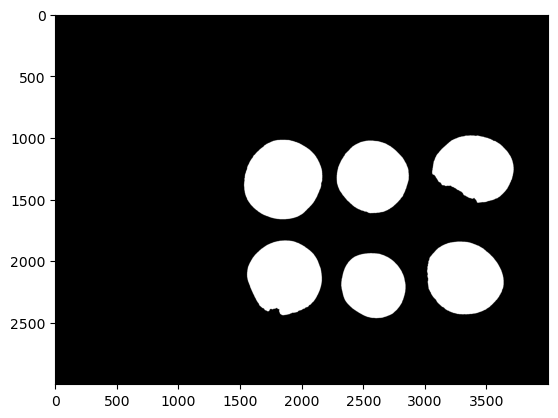

In [23]:
# now remove irregular edges using morphological opening
from skimage.morphology import binary_opening

# perform morphological opening
binary_b_rso_closing_rsh_opening = binary_opening(binary_b_rso_closing_rsh, disk(10))

# show image
plt.imshow(binary_b_rso_closing_rsh_opening, cmap='gray')

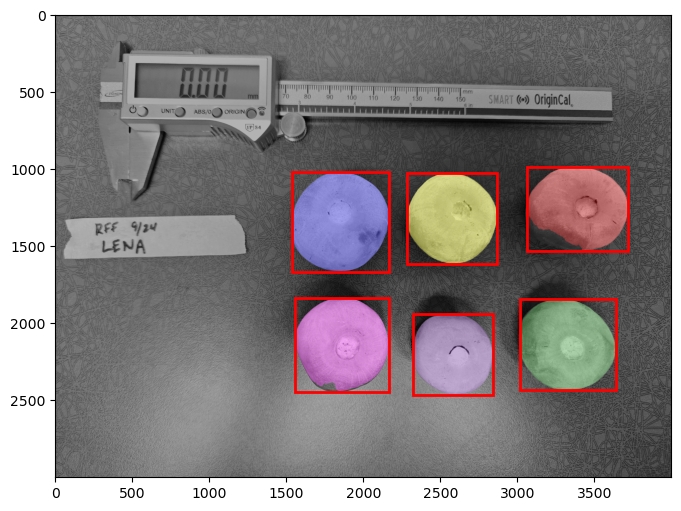

In [24]:
# segment the persimmon! 

# clear border
cleared_image = clear_border(binary_b_rso_closing_rsh_opening)

# label image regions
label_image = label(cleared_image)

# get region properties
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # draw rectangle around segmented persimmon
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

from skimage.util import img_as_ubyte

#convert image to uint8
image_label_overlay = img_as_ubyte(image_label_overlay)

# save image as png in original resolution/size with regionprops
io.imsave('C:/Users/zack/Downloads/1000010243_segmented.png', image_label_overlay)

In [25]:
# now calculate the width and height of each persimmon
for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    width = maxc - minc
    height = maxr - minr
    print(f"Width: {width}, Height: {height}")

# calculate the area of each persimmon
for region in regionprops(label_image):
    area = region.area
    print(f"Area: {area}")

# calculate the perimeter of each persimmon
for region in regionprops(label_image):
    perimeter = region.perimeter
    print(f"Perimeter: {perimeter}")

Width: 662, Height: 547
Width: 635, Height: 645
Width: 586, Height: 589
Width: 607, Height: 607
Width: 621, Height: 591
Width: 522, Height: 527
Area: 262113.0
Area: 319295.0
Area: 263868.0
Area: 280333.0
Area: 287853.0
Area: 217086.0
Perimeter: 2040.2997820866105
Perimeter: 2132.1576464628797
Perimeter: 1940.3170260293136
Perimeter: 2083.772870152029
Perimeter: 2048.843937963895
Perimeter: 1751.7413408594534


In [30]:
# combine all the above into a single loop, loop through images in folder: C:/Users/zack/Downloads/fruit_images/20240925_163221.jpg
from skimage import io
from skimage.color import rgb2lab, label2rgb
from skimage.morphology import remove_small_objects, remove_small_holes, disk, binary_closing
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.util import img_as_ubyte
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# get all images in folder
image_folder = "C:/Users/zack/Downloads/fruit_images/"

# create a list to store the region properties
data = []

for image_file in os.listdir(image_folder):
    if image_file.endswith(".jpg"):
        image = io.imread(os.path.join(image_folder, image_file))

        # convert RGB to LAB color space--L: lightness, a: green to red, b: blue to yellow
        lab_image = rgb2lab(image)
        b_channel = lab_image[:, :, 2]

        # b channel segments the persimmon better. Threshold the b channel
        thresh_b = 20
        binary_b = b_channel > thresh_b

        # remove small objects from background
        binary_b_rso = remove_small_objects(binary_b, min_size=2000)

        # use morphological closing to smooth edges
        selem = disk(4)

        # perform morphological closing
        binary_b_rso_closing = binary_closing(binary_b_rso, selem)

        # remove small holes
        binary_b_rso_closing_rsh = remove_small_holes(binary_b_rso_closing, area_threshold=1000)

        # now remove irregular edges using morphological opening
        from skimage.morphology import binary_opening

        # perform morphological opening
        binary_b_rso_closing_rsh_opening = binary_opening(binary_b_rso_closing_rsh, disk(10))

        # segment the persimmon! 

        # clear border
        cleared_image = clear_border(binary_b_rso_closing_rsh_opening)

        # label image regions
        label_image = label(cleared_image)

        # get region properties
        image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

        # convert image to uint8
        image_label_overlay = img_as_ubyte(image_label_overlay)

        # save image as png in original resolution/size with regionprops
        io.imsave(f'C:/Users/zack/Downloads/fruit_images/segmented/{image_file}', image_label_overlay)

        # now calculate the width and height of each persimmon and store in df
        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            width = maxc - minc
            height = maxr - minr
            area = region.area
            perimeter = region.perimeter
            data.append({'Image': image_file, 'Width': width, 'Height': height, 'Area': area, 'Perimeter': perimeter})

df = pd.DataFrame(data)

##### Get EXIF data for images and calculate pixel size

In [ ]:
import os
import subprocess
import exiftool
import pandas as pd

# Check if ExifTool is accessible
try:
    subprocess.run(["exiftool", "-ver"], check=True)
    print("ExifTool is accessible.")
except subprocess.CalledProcessError:
    print("ExifTool is not accessible.")
print()

def GSD_from_exif_batch(folder):
    """
    Calculate ground sampling distance (GSD) in cm/pixel from Exif data for all images in folder
    :param folder: path to folder containing images
    :return: csv file containing Exif data and GSD for all images in folder
    """
    # Get list of .JPG,.PNG, or .TIF files in folder
    files = [file for file in os.listdir(folder) if file.endswith((".jpg", ".png", ".tif"))]

    # Add folder path to each file and store as string in quotations
    files = [os.path.join(folder, file) for file in files]

    # Print all tags for first file in folder
    with exiftool.ExifToolHelper() as et:
        for d in et.get_metadata(files[0]):
            for k, v in d.items():
                print(f"{k} = {v}")
    print()

    # Empty list for storing Exif data
    Exif_data = []

    # Values for calculating ground sampling distance (GSD) W,H in cm/pixel are: SensorWidth (mm),
    # SensorHeight (mm), RelativeAltitude (m), FocalLength (mm), ImageWidth (px), ImageHeight (px)

    # Store specified tags as list of dictionaries for all files in folder
    with exiftool.ExifToolHelper() as et:
        for d in et.get_tags(files[0:-1], tags=["SourceFile", "FileName", "ImageWidth", "ImageHeight", # specify tags here
                                                "FocalLength"]):
            # append d to Exif_data list
            Exif_data.append(d)

    # Exif_data is a list of dictionaries. Convert to pandas dataframe where each unique value for SourceFile is a row
    df = pd.DataFrame(Exif_data)

    # Clean up column names; remove the text before the colon
    df.columns = df.columns.str.split(":").str[-1]

    # Convert columns to float
    df["FocalLength"] = df["FocalLength"].astype(float)
    df["ImageWidth"] = df["ImageWidth"].astype(float)
    df["ImageHeight"] = df["ImageHeight"].astype(float)

    # Add sensor width to dataframe (Sensor is Samsung Galaxy S23)
    # https://www.gsmarena.com/samsung_galaxy_s23-12082.php#:~:text=Main%20Camera%20Triple%2050%20MP%2C%20f%2F1.8%2C%2024mm%20%28wide%29%2C,4K%4030%2F60fps%2C%201080p%4030%2F60%2F240fps%2C%201080p%40960fps%2C%20HDR10%2B%2C%20stereo%20sound%20rec.%2C%20gyro-EIS
    df["SensorWidth"] = 24.0

    # # Add GSDw and to dataframe
    # # GSDw (at nadir) = (SensorWidth * RelativeHeight * 100) / (FocalLength * ImageWidth)
    # df["GSDw"] = (df.SensorWidth * df.RelativeAltitude * 100) / (df.FocalLength * df.ImageWidth)

    # Save dataframe to csv
    df.to_csv(os.path.join(folder, "Exif_data.csv"), index=False) # save mean GSDw in filename

    return df

In [ ]:
# get tags for all images in C:\Users\zack\Downloads\fruit_images

GSD_from_exif_batch(folder = "C:/Users/zack/Downloads/fruit_images/")